In [1]:
%reload_ext autoreload
%autoreload 2

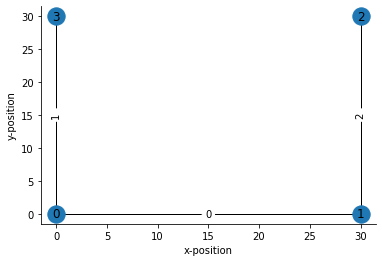

In [2]:
from track_linearization import make_track_graph, plot_track_graph
import matplotlib.pyplot as plt

node_positions = [
    (0, 0),  # xy position of node 0
    (30, 0),  # xy position of node 1
    (30, 30),  # xy position of node 2
    (0, 30),  # xy position of node 3
]

edges = [
    (0, 1),  # connects node 0 and node 1
    (0, 3),  # connects node 0 and node 3
    (1, 2),  # connects node 1 and node 2
]

track_graph = make_track_graph(node_positions, edges)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


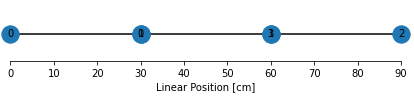

In [3]:
from track_linearization.utils import plot_graph_as_1D

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, ax=ax)


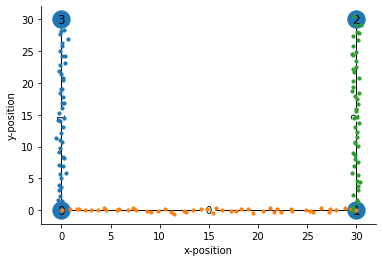

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)


In [5]:
from track_linearization import get_linearized_position

position_df = get_linearized_position(position=position, track_graph=track_graph)


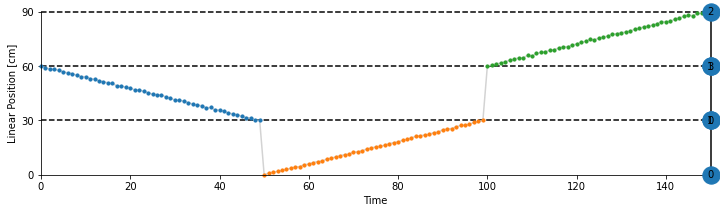

In [6]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(60, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(90, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 60, 90])
ax.set_ylim([0, 90])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph, ax=ax, axis="y", other_axis_start=position_df.index.max() + 1
)


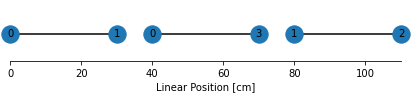

In [7]:
from track_linearization import get_linearized_position

edge_spacing = 10

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, ax=ax)


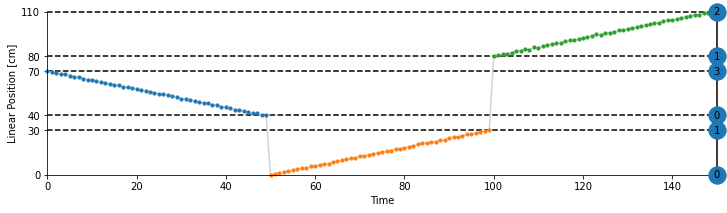

In [8]:
position_df = get_linearized_position(
    position=position, track_graph=track_graph, edge_spacing=edge_spacing
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)


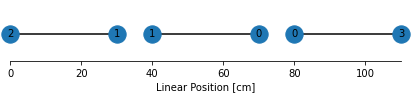

In [9]:
from track_linearization import get_linearized_position

edge_spacing = 10
edge_order = [
    (2, 1),  # connects node 2 and node 1
    (1, 0),  # connects node 1 and node 0
    (0, 3),  # connects node 0 and node 3
]

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)


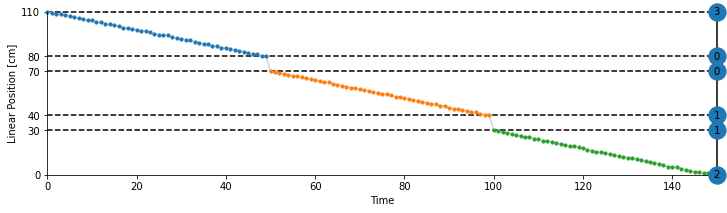

In [10]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)


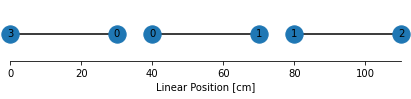

In [11]:
from track_linearization import get_linearized_position

edge_spacing = 10
edge_order = [
    (3, 0),
    (0, 1),
    (1, 2),
]

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)


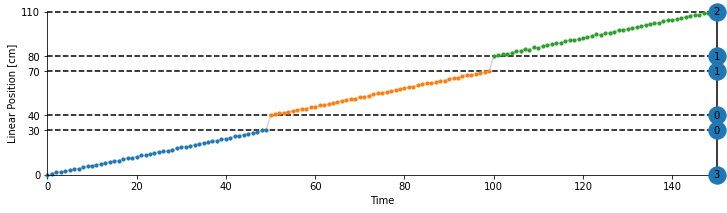

In [12]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)


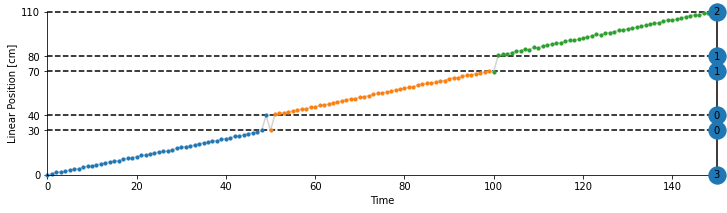

In [13]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
    use_HMM=False,
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)


## Circle

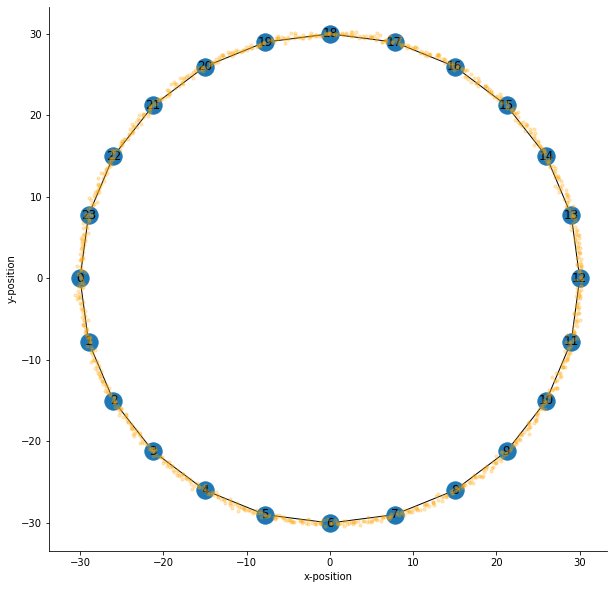

In [14]:
angle = np.linspace(-np.pi, np.pi, num=24, endpoint=False)
radius = 30

node_positions = np.stack((radius * np.cos(angle), radius * np.sin(angle)), axis=1)

node_ids = np.arange(node_positions.shape[0])
edges = np.stack((node_ids, np.roll(node_ids, shift=1)), axis=1)

track_graph = make_track_graph(node_positions, edges)

position_angles = np.linspace(-np.pi, 3 * np.pi, num=1000, endpoint=False)
position = np.stack(
    (radius * np.cos(position_angles), radius * np.sin(position_angles)), axis=1
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

fig, ax = plt.subplots(figsize=(10, 10))
plot_track_graph(track_graph, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(position[:, 0], position[:, 1], alpha=0.25, s=10, zorder=11, color="orange")


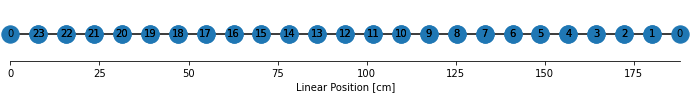

In [15]:
edge_spacing = 0
n_nodes = len(track_graph.nodes)
edge_order = np.stack(
    (np.roll(np.arange(n_nodes - 1, -1, -1), 1), np.arange(n_nodes - 1, -1, -1)), axis=1
)

fig, ax = plt.subplots(figsize=(n_nodes // 2, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)


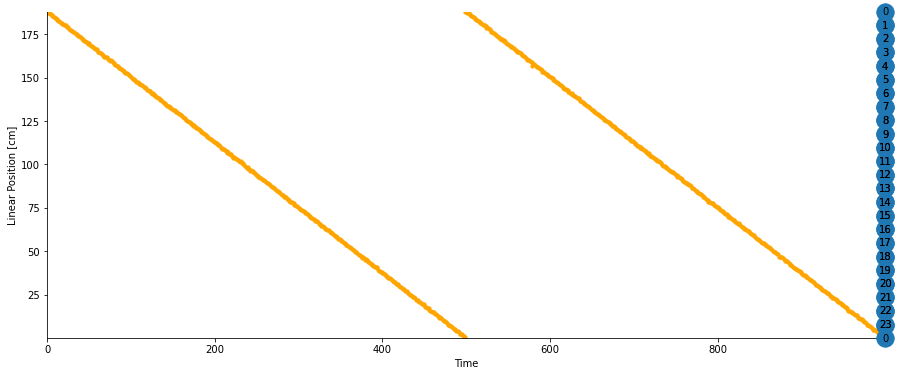

In [16]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(15, n_nodes // 4))
ax.scatter(position_df.index, position_df.linear_position, s=10, color="orange")
ax.set_ylim((position_df.linear_position.min(), position_df.linear_position.max()))
ax.set_xlim((0, position_df.index.max()))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
ax.spines["top"].set_visible(False)

plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)


## W-Track

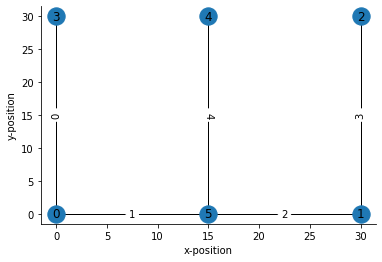

In [17]:
node_positions = [(0, 0), (30, 0), (30, 30), (0, 30), (15, 30), (15, 0)]

edges = [
    (3, 0),
    (0, 5),
    (4, 5),
    (5, 1),
    (1, 2),
]

track_graph = make_track_graph(node_positions, edges)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


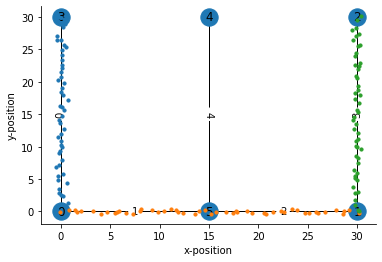

In [18]:
fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)


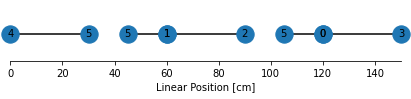

In [19]:
edge_order = [(4, 5), (5, 1), (1, 2), (5, 0), (0, 3)]
edge_spacing = [15, 0, 15, 0]

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)


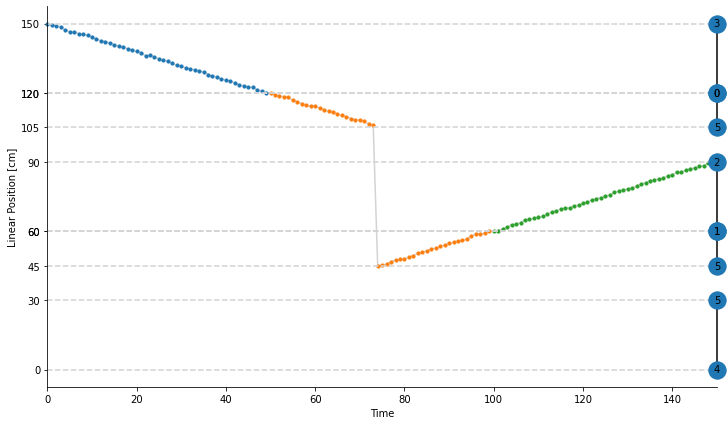

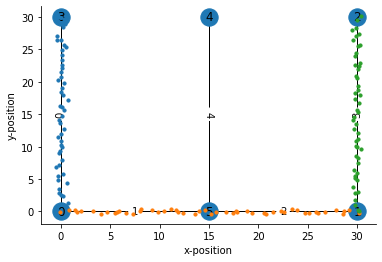

In [20]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

start_node_linear_position = 0.0
ticks = []

for ind, edge in enumerate(edge_order):
    end_node_linear_position = (
        start_node_linear_position + track_graph.edges[edge]["distance"]
    )
    ax.axhline(start_node_linear_position, color="lightgrey", linestyle="--")
    ax.axhline(end_node_linear_position, color="lightgrey", linestyle="--")
    ticks.append(start_node_linear_position)
    ticks.append(end_node_linear_position)
    try:
        start_node_linear_position += (
            track_graph.edges[edge]["distance"] + edge_spacing[ind]
        )
    except IndexError:
        pass
ax.set_yticks(ticks)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)


In [5]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.ion()

fig, ax = plt.subplots()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1)
    )
)
position += multivariate_normal(mean=0, cov=.05).rvs(position.shape)

plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)

x = plt.ginput()
print(x)
plt.show()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[]


In [7]:
import scipy.interpolate as si
import numpy as np
from functools import reduce

import matplotlib.pyplot as plt


class TooFewPointsException(Exception):
    ...


class SplineFitter:
    def click_event(self, event):
        """Extracts locations from the user interaction
        Intended to be subscribed to 'button_press_event'
        Parameters
        ----------
        event : MouseEvent
           The
        """
        # stash the last event for debugging!
        self.ev = event
        # if shift is down, clear and bail
        if event.key == "shift":
            self.clear()
            return
        # if no x or y data, bail
        if event.xdata is None or event.ydata is None:
            return
        # if not in our Axes, bail
        if event.inaxes is not self.ax:
            return
        # if left-click, append to points list
        if event.button == 1:
            self.pt_lst.append((event.xdata, event.ydata))
        # if right-click, remove the closest point
        elif event.button == 3:
            self.remove_pt((event.xdata, event.ydata))

        # re-draw (if needed)
        self.redraw()

    def remove_pt(self, loc):
        """Remove the nearest point.
        Parameters
        ----------
        loc : Tuple[float, float]
            The x, y location of the cilck
        """
        if len(self.pt_lst) > 0:
            self.pt_lst.pop(
                np.argmin(
                    list(
                        map(
                            lambda x: np.sqrt(
                                (x[0] - loc[0]) ** 2 + (x[1] - loc[1]) ** 2
                            ),
                            self.pt_lst,
                        )
                    )
                )
            )

    def redraw(self):
        """Redraw the canvas given the current set of points"""
        # get the current selected points
        if len(self.pt_lst) > 0:
            x, y = zip(*self.pt_lst)
        else:
            x, y = [], []
        # and update the Line2D with the
        self.pt_plot.set_xdata(x)
        self.pt_plot.set_ydata(y)

        # if we have more than 5 points, create a best-fit closed spline
        if len(self.pt_lst) > 5:
            SC = SplineCurve.from_pts(self.pt_lst, pix_err=self.pix_err)
            new_pts = SC.q_phi_to_xy(0, np.linspace(0, 2 * np.pi, 1000))
            center = SC.cntr
            self.pt_lst.sort(
                key=lambda x: np.arctan2(x[1] - center[1], x[0] - center[0])
            )
        else:
            new_pts = ([], [])

        # and update the data in the spline Line2D objcet
        self.sp_plot.set_xdata(new_pts[0])
        self.sp_plot.set_ydata(new_pts[1])

        self.canvas.draw_idle()

    def __init__(self, ax, pix_err=1):
        self.canvas = ax.get_figure().canvas
        self.ax = ax
        self.cid = None
        self.pt_lst = []
        self.pt_plot = ax.plot([], [], marker="o", linestyle="none", zorder=5)[0]
        self.sp_plot = ax.plot([], [], lw=3, color="r")[0]
        self.pix_err = pix_err
        self.connect_sf()

    def clear(self):
        """Clears the points"""
        self.pt_lst = []
        self.redraw()

    def connect_sf(self):
        if self.cid is None:
            self.cid = self.canvas.mpl_connect("button_press_event", self.click_event)

    def disconnect_sf(self):
        if self.cid is not None:
            self.canvas.mpl_disconnect(self.cid)
            self.cid = None

    @property
    def points(self):
        """Returns the clicked points in the format the rest of the
        code expects"""
        return np.vstack(self.pt_lst).T

    @property
    def SplineCurve(self):
        curve = SplineCurve.from_pts(self.pt_lst, pix_err=self.pix_err)
        return curve


class SplineCurve:
    """
    A class that wraps the scipy.interpolation objects
    """

    @classmethod
    def _get_spline(cls, points, pix_err=2, need_sort=True, **kwargs):
        """
        Returns a closed spline for the points handed in.
        Input is assumed to be a (2xN) array
        =====
        input
        =====
        :param points: the points to fit the spline to
        :type points: a 2xN ndarray or a list of len =2 tuples
        :param pix_err: the error is finding the spline in pixels
        :param need_sort: if the points need to be sorted
            or should be processed as-is
        =====
        output
        =====
        tck
           The return data from the spline fitting
        """
        if type(points) is np.ndarray:
            # make into a list
            pt_lst = zip(*points)
            # get center
            center = np.mean(points, axis=1).reshape(2, 1)
        else:
            # make a copy of the list
            pt_lst = list(points)

            # compute center
            tmp_fun = lambda x, y: (x[0] + y[0], x[1] + y[1])

            center = np.array(reduce(tmp_fun, pt_lst)).reshape(2, 1)
            center /= len(pt_lst)
        if len(pt_lst) < 5:
            raise TooFewPointsException("not enough points")

        if need_sort:
            # sort the list by angle around center
            pt_lst.sort(key=lambda x: np.arctan2(x[1] - center[1], x[0] - center[0]))
        # add first point to end because it is periodic (makes the
        # interpolation code happy)
        pt_lst.append(pt_lst[0])
        # make array for handing in to spline fitting
        pt_array = np.vstack(pt_lst).T
        # do spline fitting

        tck, u = si.splprep(pt_array, s=len(pt_lst) * (pix_err**2), per=True)
        return tck

    @classmethod
    def from_pts(cls, new_pts, **kwargs):
        tck = cls._get_spline(new_pts, **kwargs)
        this = cls(tck)
        this.raw_pts = new_pts
        return this

    def __init__(self, tck):
        """Use `from_pts` class method to construct instance"""
        self.tck = tck
        self._cntr = None
        self._circ = None
        self._th_offset = None

    def write_to_hdf(self, parent_group, name=None):
        """
        Writes out the essential data (spline of central curve) to hdf file.
        """
        if name is not None:
            curve_group = parent_group.create_group(name)
        else:
            curve_group = parent_group
        curve_group.attrs["tck0"] = self.tck[0]
        curve_group.attrs["tck1"] = np.vstack(self.tck[1])
        curve_group.attrs["tck2"] = self.tck[2]

    @property
    def circ(self):
        """returns a rough estimate of the circumference"""
        if self._circ is None:
            new_pts = si.splev(np.linspace(0, 1, 1000), self.tck, ext=2)
            self._circ = np.sum(np.sqrt(np.sum(np.diff(new_pts, axis=1) ** 2, axis=0)))
        return self._circ

    @property
    def cntr(self):
        """returns a rough estimate of the circumference"""
        if self._cntr is None:
            new_pts = si.splev(np.linspace(0, 1, 1000), self.tck, ext=2)
            self._cntr = np.mean(new_pts, 1)
        return self._cntr

    @property
    def th_offset(self):
        """
        The angle from the y-axis for (x, y) at `phi=0`
        """
        if self._th_offset is None:
            x, y = self.q_phi_to_xy(0, 0) - self.cntr.reshape(2, 1)
            self._th_offset = np.arctan2(y, x)
        return self._th_offset

    @property
    def tck0(self):
        return self.tck[0]

    @property
    def tck1(self):
        return self.tck[1]

    @property
    def tck2(self):
        return self.tck[2]

    def q_phi_to_xy(self, q, phi, cross=None):
        """Converts q, phi pairs -> x, y pairs.  All other code that
        does this should move to using this so that there is minimal
        breakage when we change over to using additive q instead of
        multiplicative"""
        # make sure data is arrays
        q = np.asarray(q)
        # convert real units -> interpolation units
        phi = np.mod(np.asarray(phi), 2 * np.pi) / (2 * np.pi)
        # get the shapes
        q_shape, phi_shape = [
            _.shape if (_.shape != () and len(_) > 1) else None for _ in (q, phi)
        ]

        # flatten everything
        q = q.ravel()
        phi = phi.ravel()
        # sanity checks on shapes
        if cross is False:
            if phi_shape != q_shape:
                raise ValueError(
                    "q and phi must have same" + " dimensions to broadcast"
                )
        if cross is None:
            if (
                (phi_shape is not None)
                and (q_shape is not None)
                and (phi_shape == q_shape)
            ):
                cross = False
            elif q_shape is None:
                cross = False
                q = q[0]
            else:
                cross = True

        x, y = si.splev(phi, self.tck, ext=2)
        dx, dy = si.splev(phi, self.tck, der=1, ext=2)
        norm = np.sqrt(dx**2 + dy**2)
        nx, ny = dy / norm, -dx / norm

        # if cross, then
        if cross:
            data_out = zip(
                *map(
                    lambda q_: (
                        (x + q_ * nx).reshape(phi_shape),
                        (y + q_ * ny).reshape(phi_shape),
                    ),
                    q,
                )
            )
        else:

            data_out = np.vstack(
                [(x + q * nx).reshape(phi_shape), (y + q * ny).reshape(phi_shape)]
            )

        return data_out


fig, ax = plt.subplots()
ax.set_title("left-click to add points, right-click to remove, shift-click to clear")
sp = SplineFitter(ax, 0.001)
plt.show()


# exercise (10 minutes)
# - add pick event to move a point


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …